## Assignment 8
Tora Mullings
10/30/2022

## Introduction
Udemy is an online learning platform that offers educational videos of a variety of topics. For many people, it has made learning more accessible and cheaper. I have used it to learn specific skills related to data analysis in the past. I found datasets of some of Udemy's music and web development courses on Kaggle. https://www.kaggle.com/datasets/thedevastator/udemy-courses-revenue-generation-and-course-anal.
There is information such as the price and duration of the courses.

What insights can we draw from this data?

In [41]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

We are working with 2 separate dataframes, music courses and web development courses. The columns for each are the same.

In [42]:
musicdf = pd.read_csv('https://raw.githubusercontent.com/djunga/602/main/music_courses.csv')
webdevdf = pd.read_csv('https://raw.githubusercontent.com/djunga/602/main/webdev_courses.csv')
musicdf.head(2)

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,19421,Free Beginner Electric Guitar Lessons,https://www.udemy.com/beginner-electric-guitar...,0,101154,1042,95,All Levels,0.88,4.5,2012-06-15T17:00:33Z,Musical Instruments
1,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,200,75499,7676,362,Beginner Level,0.96,30.0,2014-08-07T06:27:51Z,Musical Instruments


It isn't clear what some of the columns are for. What is `num_subscribers`? In addition, the `Rating` values appear to be on a 0-1 scale. Upon visiting the Udemy website, we see that the ratings are on a 0-5 scale. Why did the dataset creator change the scales? We will have to make some assumptions:
- The ratings are properly scaled.
- `num_subscribers` is the number of students in the course.

What are the datatypes of each column?

In [43]:
print(musicdf.dtypes)
print(webdevdf.dtypes)

course_id                int64
course_title            object
url                     object
price                    int64
num_subscribers          int64
num_reviews              int64
num_lectures             int64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object
course_id              float64
course_title            object
url                     object
price                  float64
num_subscribers        float64
num_reviews            float64
num_lectures           float64
level                   object
Rating                 float64
content_duration       float64
published_timestamp     object
subject                 object
dtype: object


I see that the datatype of the `published_timestamp` is object. We can change it into a datatime object.

In [44]:
musicdf['published_timestamp'] =  pd.to_datetime(musicdf['published_timestamp'])
webdevdf['published_timestamp'] =  pd.to_datetime(webdevdf['published_timestamp'])
musicdf.dtypes

course_id                            int64
course_title                        object
url                                 object
price                                int64
num_subscribers                      int64
num_reviews                          int64
num_lectures                         int64
level                               object
Rating                             float64
content_duration                   float64
published_timestamp    datetime64[ns, UTC]
subject                             object
dtype: object

In [45]:
musicdf.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
count,6.800000e+02,680.000000,680.000000,680.000000,680.000000,680.000000,680.000000
mean,6.386484e+05,49.558824,1245.130882,46.652941,38.316176,0.308912,2.854387
std,3.472305e+05,41.187592,5676.381419,337.735677,42.739700,0.303799,3.470463
min,1.221400e+04,0.000000,0.000000,0.000000,4.000000,0.000000,0.483333
25%,3.383060e+05,20.000000,31.000000,2.000000,14.000000,0.070000,1.000000
50%,6.533970e+05,40.000000,138.000000,5.000000,25.000000,0.150000,2.000000
75%,9.172400e+05,50.000000,870.250000,17.000000,43.000000,0.520000,3.500000
max,1.272282e+06,200.000000,101154.000000,7676.000000,362.000000,1.000000,38.000000


For the music courses, we can see that some are free and the highest priced course is $200.

In [46]:
print(musicdf.isna().sum())
print(webdevdf.isna().sum())

course_id              0
course_title           0
url                    0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
Rating                 0
content_duration       0
published_timestamp    0
subject                0
dtype: int64
course_id              2
course_title           2
url                    2
price                  2
num_subscribers        2
num_reviews            2
num_lectures           2
level                  2
Rating                 2
content_duration       2
published_timestamp    2
subject                1
dtype: int64


The music data does not have missing values, but the web dev has 2. Let's find them:

In [47]:
webdevdf[webdevdf['course_id'].isna()]

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,Subject: Web Development


Let's remove these 2 rows, since they cannot be salvaged.

In [48]:
webdevdf.drop(labels=[193,405], axis=0, inplace=True)

Create a subset of the data, choosing the columns we want to work with.

In [49]:
columns = ['course_title','price','num_subscribers','num_reviews','num_lectures','level','Rating','content_duration','published_timestamp','subject']
musicdf = musicdf[columns] 
webdevdf = webdevdf[columns]
## Change the case of the column names to lowercase.
musicdf = musicdf.rename(columns={'Rating':'rating'})
webdevdf = webdevdf.rename(columns={'Rating':'rating'})
musicdf["subject"] = "Music"
webdevdf["subject"] = "Web Development"

How many music courses have a rating of 0?

In [50]:
(musicdf['rating']==0).value_counts()

False    669
True      11
Name: rating, dtype: int64

11 music courses have a rating of 0. We can examine these courses to see if anything stands out:

In [51]:
musicdf[musicdf['rating']==0]

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject
609,Poldark TV series Soundtracks for Piano-Quickl...,20,8,1,9,All Levels,0.0,1.000000,2017-03-16 22:39:09+00:00,Music
610,The Art of the Blues Shuffle - A Guitarist's G...,20,8,0,11,Beginner Level,0.0,1.500000,2016-06-26 16:57:13+00:00,Music
611,Beginner Level Popular Piano Program - Month 1,30,7,2,13,Intermediate Level,0.0,1.000000,2016-05-24 17:31:13+00:00,Music
612,Guitarra para principiantes,20,7,1,46,All Levels,0.0,2.000000,2015-01-22 19:34:43+00:00,Music
613,Aprende a tocar ritmos latinos en el teclado,50,7,0,31,All Levels,0.0,3.500000,2014-05-09 20:01:06+00:00,Music
614,Aprende todos los secretos de la salsa para piano,50,7,0,17,Beginner Level,0.0,3.000000,2014-05-09 19:50:45+00:00,Music
615,Blues Master - Advanced Techniques Piano Course,75,7,2,14,All Levels,0.0,1.000000,2016-03-29 00:12:02+00:00,Music
616,Aprende a tocar la guitarra,50,7,1,25,Intermediate Level,0.0,1.500000,2013-02-22 18:19:38+00:00,Music
617,Learn How To Play 25 Classic Hip Hop Songs Ch.2,25,7,1,27,All Levels,0.0,3.500000,2017-05-23 23:51:34+00:00,Music
618,Learn Piano Online-A Quiet Solace Piano Solo,50,7,0,10,Intermediate Level,0.0,1.000000,2016-08-29 21:48:56+00:00,Music


Maybe the reason for the 0 ratings is that there are so few students in these courese. It is likely that they have not taken the time to rate the courses.

## Visualizations

### Part 1

Scatterplots

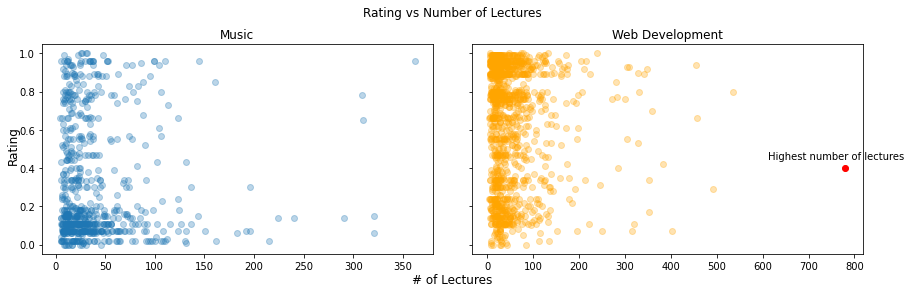

In [52]:
fig, axs = plt.subplots(nrows=1, ncols=2,sharey=True)
fig.supxlabel('# of Lectures', x=1.05)
fig.supylabel('Rating')
fig.suptitle('Rating vs Number of Lectures', x=1.05)
axs[0].scatter(musicdf['num_lectures'], musicdf['rating'],alpha=0.3)
axs[0].title.set_text('Music')
axs[1].scatter(webdevdf['num_lectures'], webdevdf['rating'], color="orange", alpha=0.3)
axs[1].title.set_text('Web Development')
plt.subplots_adjust(left=0.1,
                    bottom=0.12,
                    right=2,
                    top=0.85,
                    wspace=0.1,
                    hspace=0.4)

plt.scatter(webdevdf['num_lectures'][80], webdevdf['rating'][80],  color='red')
plt.annotate("Highest number of lectures", xy=(0.757, 0.45), xycoords='axes fraction')
plt.show()

In [53]:
webdevdf[webdevdf['num_lectures'] == webdevdf['num_lectures'].max()]

,course_title,price,num_subscribers,num_reviews,num_lectures,level,rating,content_duration,published_timestamp,subject
80,Back to School Web Development and Programming...,200.0,18170.0,117.0,779.0,All Levels,0.4,44.5,2013-08-19 14:53:00+00:00,Web Development


### What does this plot reveal?
This plot shows Rating vs number of lectures. In both plots, we see that most courses contain fewer lectures. Several courses with a high number of lectures have low ratings, less than 0.5. In fact, the web development course with the highest number of lectures at 779 has a rating of 0.4. This course is indicated by the red point.
Overall, there does not appear to be a particular trend between these 2 variables.

### What properties does this plot utilize?
- Change the title and x/y labels
- Add annotations

Boxplots

Text(0, 0.5, 'Price ($)')

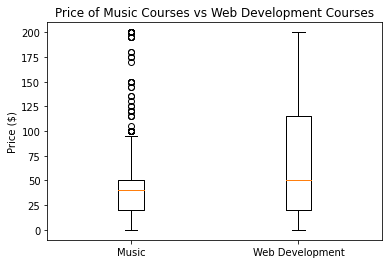

In [54]:
# boxplots of price for music and webdev

fig, axs = plt.subplots()
axs.set_title('Price of Music Courses vs Web Development Courses')
data = [musicdf['price'], webdevdf['price']]
axs.boxplot(data)
axs.set_xticklabels(['Music', 'Web Development'])
axs.set_ylabel('Price ($)')


### What does this plot reveal?
This plot displays summaries of the prices of music and web development courses. The median price of web development courses is higher. There are many high outliers for music courses. The prices of web development courses stay within the range.

### What properties does this plot utilize?
- Change the title and x/y labels
- Modify Axis Text Ticks/Labels

Histograms

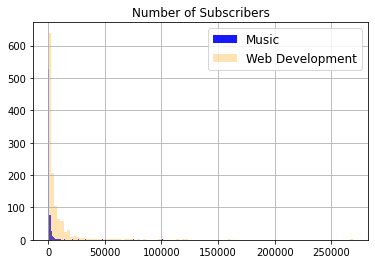

In [55]:
# overlayed histogram of number of subscribers

fig, axs = plt.subplots()
axs.title.set_text("Number of Subscribers")
musicdf['num_subscribers'].hist(color='blue',alpha=0.9, ax=axs, label='Music', bins=100)
webdevdf['num_subscribers'].hist(color='orange',alpha=0.3, ax=axs, label='Web Development', bins=100)
plt.legend(loc="upper right", prop={'size': 12})
plt.show()

In [56]:
print('Highest number of students in a music class: {}'.format(musicdf['num_subscribers'].max()))
print('Highest number of students in a web development class: {}'.format(webdevdf['num_subscribers'].max()))

Highest number of students in a music class: 101154
Highest number of students in a web development class: 268923.0


### What does this plot reveal?
This plot displays the distribution of the number of students in the courses. The x-axis shows the number of students and the y-axis shows the number of courses. There appears to be a longer tail for the web development courses. This indicates that there are larger class sizes than in the music courses. The largest web development class size is over 250k.
It is quite difficult to see the details in this plot.

### What properties does this plot utilize?
- Change the title
- Use and change a legend position
- Change a legend font size
- Create a single legend for all subplots

Wordcloud

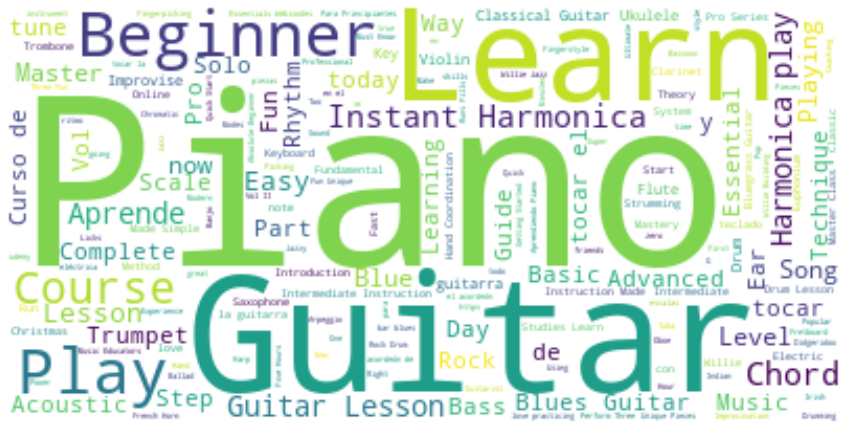

In [57]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(i for i in musicdf['course_title'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### What does this plot reveal?
This plot displays the most frequently appearing words in music course titles. It appears that many courses teach piano and guitar. There are many beginner courses as well.


## Part 2
Recreate the plots with Seaborn.

Scatterplots

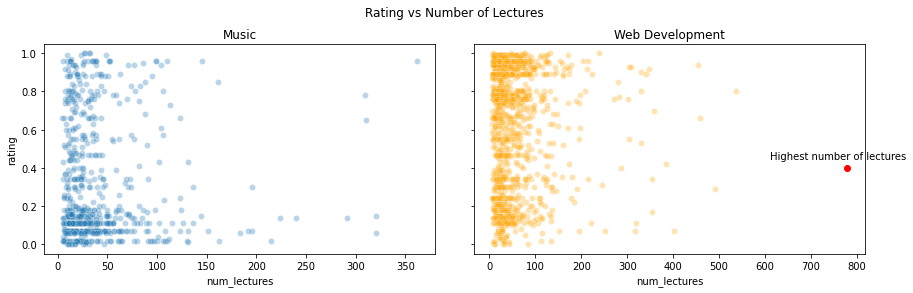

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True)

axs[0].set_title('Music')
sns.scatterplot(data=musicdf, x="num_lectures", y="rating", ax=axs[0], alpha=0.3)

axs[1].set_title('Web Development')
sns.scatterplot(data=webdevdf, x="num_lectures", y="rating", ax=axs[1], color="orange", alpha=0.3)

plt.scatter(webdevdf['num_lectures'][80], webdevdf['rating'][80], color='red')
plt.annotate("Highest number of lectures", xy=(0.757, 0.45), xycoords='axes fraction')

plt.subplots_adjust(left=0.1,
                    bottom=0.12,
                    right=2,
                    top=0.85,
                    wspace=0.1,
                    hspace=0.4)
fig.suptitle('Rating vs Number of Lectures', x=1.05)
plt.show()

This plot is almost identical to the one from Matplotlib. One difference is that there does not appear to be a straightforward way to change the x- and y- axis labels.

### What properties does this plot utilize?
- Change the title and x/y labels
- Add annotations

Boxplots

Text(0, 0.5, 'Price ($)')

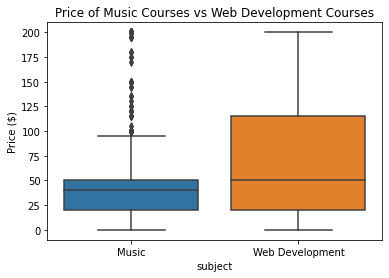

In [59]:
fig, axs = plt.subplots()
axs.set_title('Price of Music Courses vs Web Development Courses')
data = pd.concat([musicdf, webdevdf])
sns.boxplot(data=data, x="subject", y="price")
axs.set_ylabel('Price ($)')

One difference is that the colors filled in for music and web development automatically. Also, the two dataframes were concatenated into one in order to be passed to Seaborn's boxplot function. This directly affected the text for the x-axis, since it made use of `subject` column. For Matplotlib, the x-axis was manually set.

### What properties does this plot utilize?
- Change the title and x/y labels
- Modify Axis Text Ticks/Labels

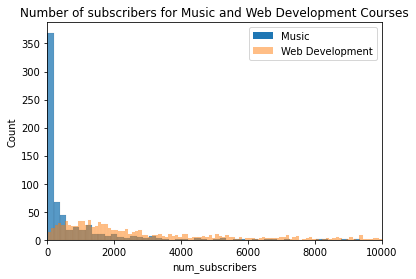

In [60]:
fig, ax = plt.subplots()

sns.histplot(data=musicdf, x="num_subscribers", ax=ax, label="Music")
sns.histplot(data=webdevdf, x="num_subscribers", ax=ax, alpha=0.5, binwidth=100, label="Web Development")
ax.title.set_text("Number of subscribers for Music and Web Development Courses")
ax.set_xlim(0,10000)
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[0], handles[2]], [labels[0], labels[2]])
plt.show()

It is much easier to draw insights from this plot versus the one from Matplotlib alone. It appears that, for music courses in particular, there are more courses with few students. There is also a clear decline in the number of courses that have a large number of students (1000+). This is not quite the case with web development, since the distribution is more random.

### What properties does this plot utilize?
- Change the title
- Create a single legend for all subplots

Wordcloud

There did not appear to be a special way to implement a wordcloud in Seaborn.

## Part 3
### The difference between creating a plot in Matplotlib vs Seaborn

Most of the above plots utilized subplots. When making subplots in Matplotlib, there were more calls to the axes. For example, the scatterplots required 2 different axes, and the boxplots required one axis. In each case, the axes were the objects that were being operated on. For Seaborn, the axes were objects that were passed to the seaborn object. 
Aside from the axes, another difference is that Seaborn appears to be more equipped to handle style implementations. Although an example is not present among the above plots, one attribute Seaborn has control of is hue. This easily allows you to choose the column that determines how your plot's data points will be colored. You can achieve the same in Matplotlib, but the code is more verbose.
The effect is that Seaborn has simpler syntax, and therefore may be preferred when creating more nuanced plots.

## Conclusion

- When a course contains more lectures, it does not necessarily mean that it will be better i.e. rated higher. The opposite does not hold either, based on the scatterplots.
- Most the music courses are under $100. As seen in the boxplots, the more expensive courses are outliers. In contrast the web development courses have a wide range of prices, with no outliers.
- There appears to be smaller class sizes for music courses.

Udemy could possibly use these insights to alter their business model. More insights can potentially be extracted from the datasets.